# K-means Clustering method

####  K-means clustering and implementation in R

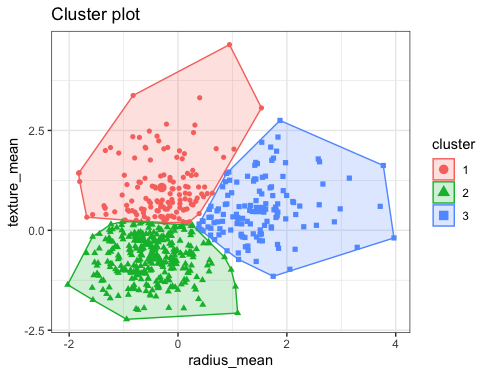

In [1]:
# Implement it in R
# first of all we have to import dataset

data = read.csv('../input/clustering/Clustering.csv', header = T)
data = as.data.frame(data)
head(data)
class(data)



,X,x,y
,<int>,<dbl>,<dbl>
1,1,3.3675960,3.536694
2,2,2.6678698,4.479919
3,3,1.3441712,3.282591
4,4,1.3894138,4.683227
5,5,1.6446438,4.320822
6,6,0.7760274,2.653667


[1] "data.frame"

In [2]:
# We remove the first column because it represents the row number.
data = data[, -1]
head(data)


,x,y
,<dbl>,<dbl>
1,3.3675960,3.536694
2,2.6678698,4.479919
3,1.3441712,3.282591
4,1.3894138,4.683227
5,1.6446438,4.320822
6,0.7760274,2.653667


In [3]:
# tip: Before Appling dataset to K-means clustering you should better scale your data
data = scale(data)
class(data)

[1] "matrix" "array"

In [4]:
# Becuase the output of scale function is 'matrix''array', I transform it to dataframe

data = as.data.frame(data)

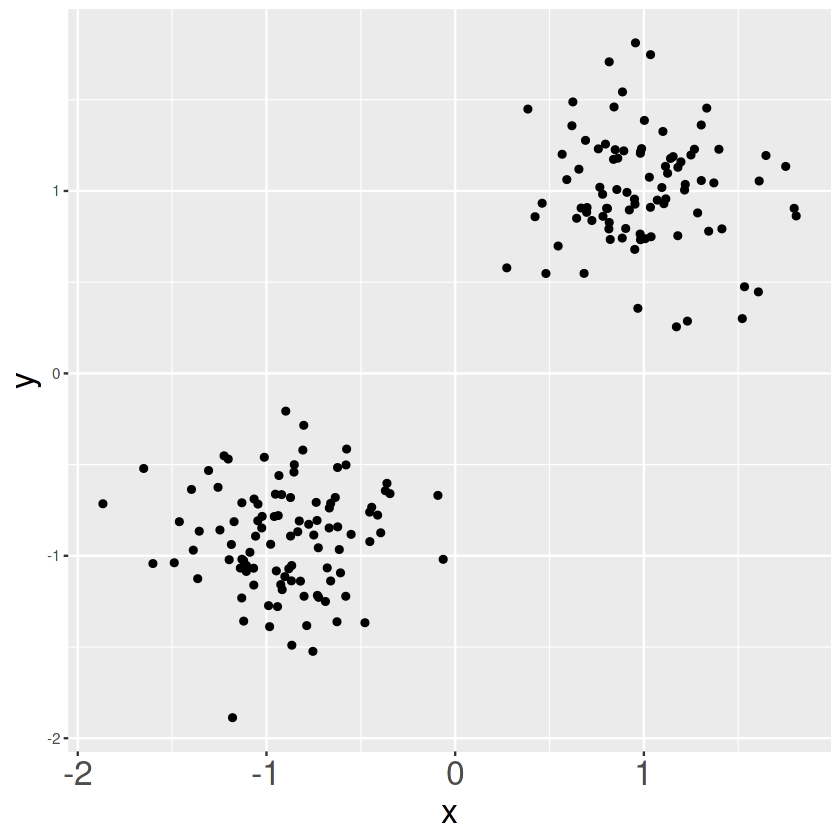

In [5]:
# Because This is a simple dataset and I create it for testing the Clustering approach
# let me show you the scatter plot between x, y, and latter applying it to k-means
library(ggplot2)
ggplot(data, aes(x, y)) + 
    geom_point() +  
    theme(
      axis.title.x = element_text(size = 20),
      axis.text.x = element_text(size = 20),
      axis.title.y = element_text(size = 20))


It is obvious we have tow cluster, But we want to test k-means algorithm which can find to two cluster or not.

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



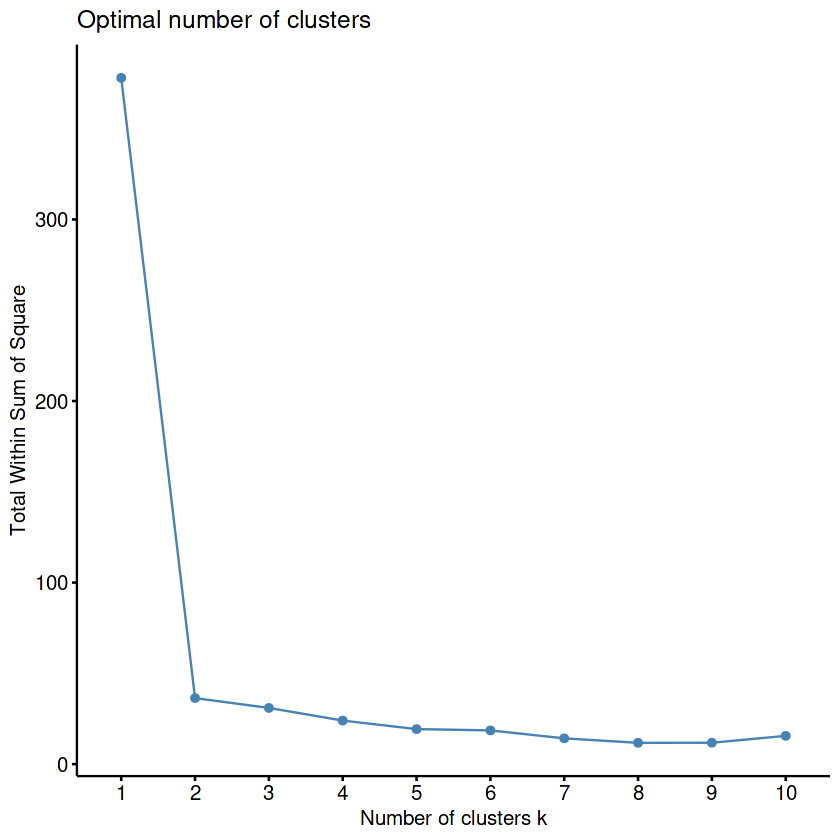

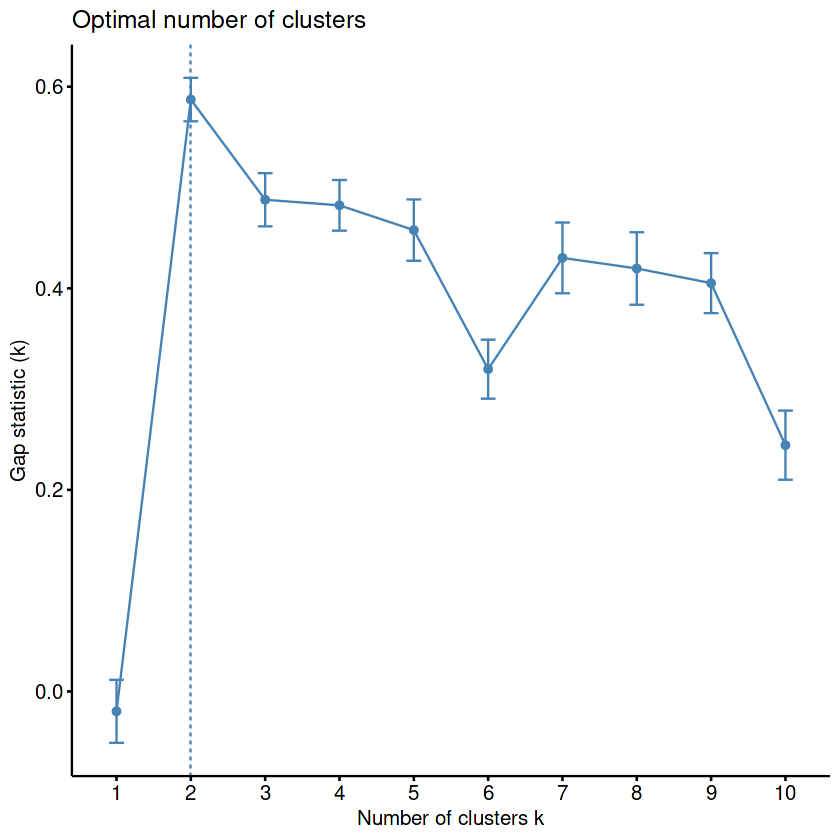

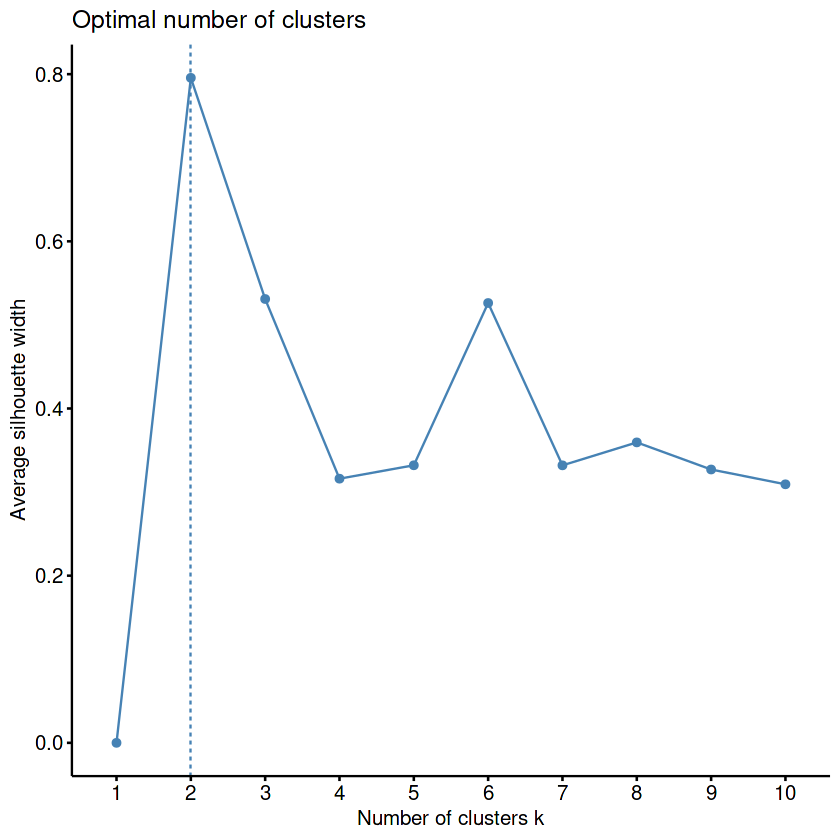

In [6]:
# In Kmeans Algorithm we have to define the number of Cluster which represent with k
# fortunatly in R, We have some intersting functions for selecting k.
library(factoextra)

fviz_nbclust(data, kmeans, method = "wss")
# method can be = 'gap_stat', 'wss', 'silhouette'

fviz_nbclust(data, kmeans, method = "gap_stat")


fviz_nbclust(data, kmeans, method = "silhouette")

In [7]:
# All method('wss', 'silhouette', and gap_stat) show us it's better choose k = 2

In [8]:
set.seed(123) # set seed for all of us get the same result
km <- kmeans(data, 2)
km


K-means clustering with 2 clusters of sizes 90, 100

Cluster means:
           x          y
1  0.9961046  1.0027646
2 -0.8964941 -0.9024881

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 17.67945 18.70339
 (between_SS / total_SS =  90.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [9]:
# km$cluster ontained labeled for each observation. We can add another column that represents the label of each row.
dd = data
dd$label = km$cluster

head(dd)
tail(dd)

,x,y,label
,<dbl>,<dbl>,<int>
1,-0.4109417,-0.7769707,2
2,-0.6233551,-0.5160380,2
3,-1.0251856,-0.8472654,2
4,-1.0114515,-0.4597951,2
5,-0.9339722,-0.5600503,2
6,-1.1976550,-1.0212504,2


,x,y,label
,<dbl>,<dbl>,<int>
185,1.0381407,0.7489621,1
186,1.1805201,1.1297780,1
187,0.6236404,1.4880627,1
188,0.6988578,0.9092437,1
189,0.4232555,0.8588256,1
190,0.9554999,1.8117475,1


# Visulize our results
The function fviz_cluster() [factoextra package] can be used to easily visualize k-means
clusters. It takes k-means results and the original data as arguments. In the resulting
plot, observations are represented by points, using principal components if the number
of variables is greater than 2



Warning message:
“ggrepel: 71 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


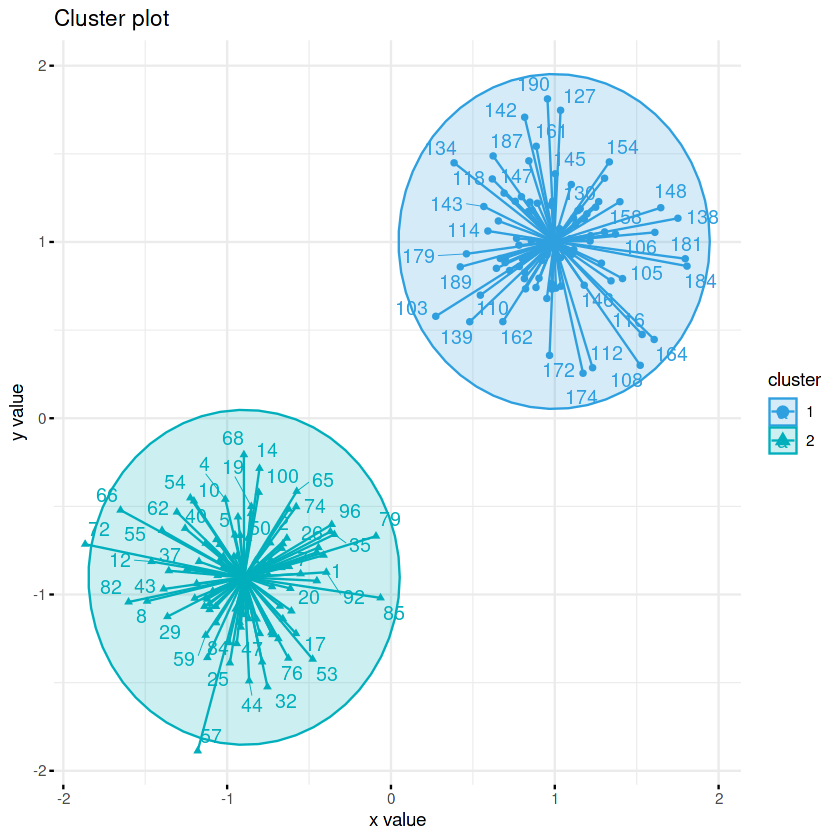

In [10]:
fviz_cluster(km, data = data,
  palette = c("#2E9FDF", "#00AFBB"),
  ellipse.type = "euclid", # Concentration ellipse
  star.plot = TRUE, # Add segments from centroids to items
  repel = TRUE, # Avoid label overplotting (slow)
  ggtheme = theme_minimal())



# congratulation, our k-means model find pattern which hide in our dataset

# References
- Hands-On Machine Learning with R
- Practical Guide To Cluster Analysis in R